# Clustering and Fitting Assignment

## Student ID: 23081013

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor



In [4]:
# Utility Functions

def plot_outliers(df, feature):
    """
    Plots a boxplot to check for outliers, removes them using the IQR method,
    and plots a boxplot again after outlier removal.

    Parameters:
    - df: pandas DataFrame
    - feature: str, the column/s name to analyze

    Returns:
    - None
    """
    # Basic configuration
    plt.figure(figsize=(12, 6))

    # Boxplot before outlier removal
    df[feature].boxplot(patch_artist=True, boxprops=dict(facecolor="skyblue"))
    plt.title(f"Boxplot for outliers")
    plt.ylabel("Values")
    plt.xlabel("Features")
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return


def plot_histogram(df, feature):
    """
    Plots a histogram to visualize the distribution of a continuous feature.

    Parameters:
    - df: pandas DataFrame
    - feature: str, the column name

    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(df[feature], kde=True, bins=10, color='skyblue')
    plt.title(f"Histogram for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


def plot_bar(data):
    """
    Plots a bar chart for the distribution of categorical values.

    Parameters:
    - data: pandas DataFrame

    Returns:
    - None
    """
    for feature in data.columns:
        # Check if the feature is categorical (limited unique values)
        if data[feature].dtype == 'object' or len(data[feature].unique()) < 20:
            value_counts = data[feature].value_counts()

            # Plotting the bar chart
            plt.figure(figsize=(12, 6))
            sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")
            plt.title(f"Bar Plot for {feature}")
            plt.xlabel(feature)
            plt.ylabel("Count")
            plt.tight_layout()
            plt.show()


def plot_correlation(correlation_matrix):
    """
    Plots a heatmap of the correlation matrix.

    Parameters:
    - correlation_matrix: pandas DataFrame, the correlation matrix

    Returns:
    - None
    """
    # Basic configuration
    plt.figure(figsize=(12, 6))

    # Heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

    return


def kmeans_clustering(data, features, max_clusters=10):
    """
    Applies KMeans clustering to scaled data and uses the elbow method to determine the optimal number of clusters.

    Parameters:
    - data: pandas DataFrame, the dataset.
    - features: list of str, column names to use for clustering.
    - max_clusters: int, maximum number of clusters to consider for the elbow method.

    Returns:
    - kmeans_model: Fitted KMeans model with the optimal number of clusters.
    - result_df: DataFrame with an added 'Cluster' column indicating the cluster assignments.
    - scaler: Scaler used for data scaling.
    """
    # Scale the data
    X = data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Elbow method to find the optimal number of clusters
    distortions = []
    cluster_range = range(1, max_clusters + 1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        distortions.append(kmeans.inertia_)

    # Plot the graph
    plt.figure(figsize=(12, 6))
    plt.plot(cluster_range, distortions, marker='o')
    plt.title("Elbow Method for Optimal Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion (Inertia)")
    plt.xticks(cluster_range)
    plt.grid(False)
    plt.show()
    print()

    # Fit the KMeans model with the optimal number of clusters
    optimal_clusters = int(input("Enter the optimal number of clusters based on the elbow plot: "))
    kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
    data['Cluster'] = kmeans_model.fit_predict(X_scaled)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
    print(f"Silhouette Score for {optimal_clusters} clusters: {silhouette_avg:.4f}")

    return kmeans_model, data, scaler


def plot_kmeans_clusters(data, features, kmeans_model):
    """
    Plots each feature against the cluster label for KMeans clustering.
    Visualizes the data points with color-coded clusters.

    Parameters:
    - data: pandas DataFrame, the dataset with the 'Cluster' column.
    - features: list of str, the columns used for clustering.
    - kmeans_model: Fitted KMeans model.

    Returns:
    - None
    """
    features = list(features)

    # Assign cluster labels to the data and get the cluster centroids
    data['Cluster'] = kmeans_model.labels_
    centroids = kmeans_model.cluster_centers_

    # Scatter plot for each feature vs Cluster
    for feature in features:

        if feature == 'Cluster':
            continue

        plt.figure(figsize=(12, 6))
        sns.scatterplot(x=data[feature], y=data['Cluster'], hue=data['Cluster'], palette="Set1", s=100, edgecolor='black')

        for i, centroid in enumerate(centroids):
            plt.scatter(centroid[features.index(feature)], i, c='red', s=200, marker='X', label=f'Centroid {i}')

        plt.title(f"Feature: {feature} vs Clusters")
        plt.xlabel(feature)
        plt.ylabel("Cluster")
        plt.legend(title='Cluster', loc='best')
        plt.yticks([0, 1, 2])
        plt.grid(False)
        plt.tight_layout()
        plt.show()


def plot_regression(y_test, y_pred, model_name = "Linear Regression"):
    """
    Function to plot actual vs predicted values for multiple models.

    Parameters:
    - y_test: Actual values (target values).
    - *y_preds: Predicted values from one or more models.
      (Can handle predictions from multiple models passed as arguments)
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'Model {model_name} - Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.tight_layout()
    plt.show()

# Part 1: Data Fetch and Summary

In [6]:
# Read data
df = pd.read_csv("C:/Users/amant/OneDrive/Desktop/UH MSc In DS/Applied Data science/Assignment/Credit Card Customer Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [8]:
# Check data schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


# Part 2: Data Cleaning & Exploratory Data Analysis

In [12]:
# Check for duplicated rows
df.duplicated().sum()

11

In [14]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [16]:
# Check basic data statistics
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,34878.274268,4.708783,2.397535,2.624037,3.590139
std,37813.736638,2.173763,1.625148,2.952888,2.877911
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,11000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,49000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [18]:
# Check skewness & Kurtosis
skewness = df.skew()
kurtosis = df.kurt()
results = pd.DataFrame({
    "Skewness": skewness,
    "Kurtosis": kurtosis
})
results

,Skewness,Kurtosis
Avg_Credit_Limit,2.186592,5.035073
Total_Credit_Cards,0.150120,-0.374373
Total_visits_bank,0.149368,-1.093525
Total_visits_online,2.209521,5.626546
Total_calls_made,0.656954,-0.535270


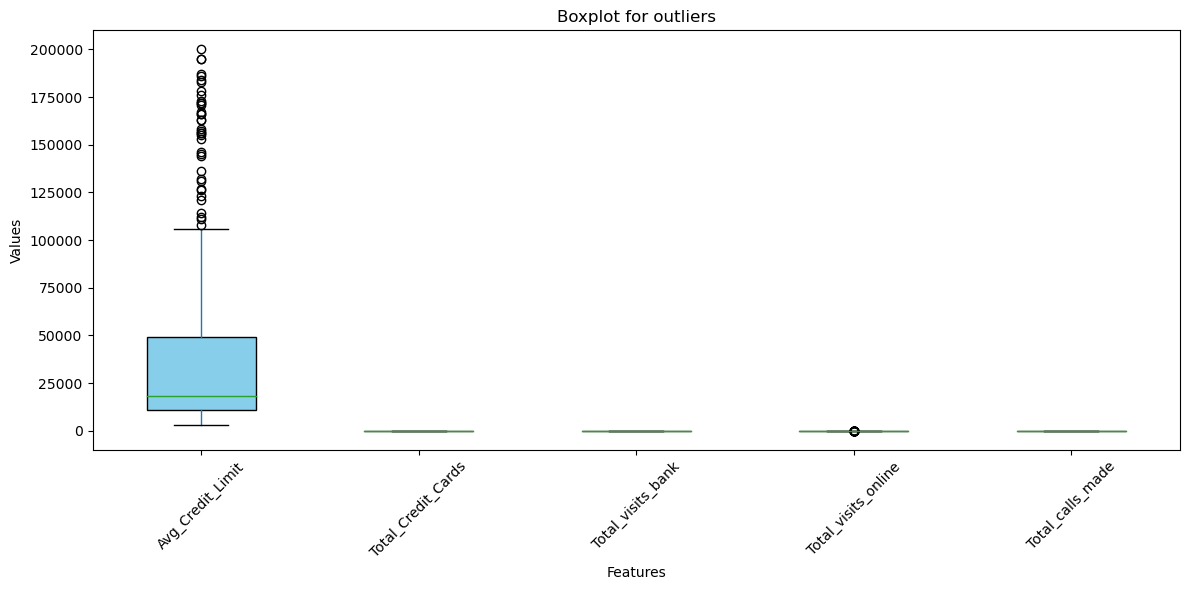

In [20]:
# Check for outliers
plot_outliers(df, df.columns)

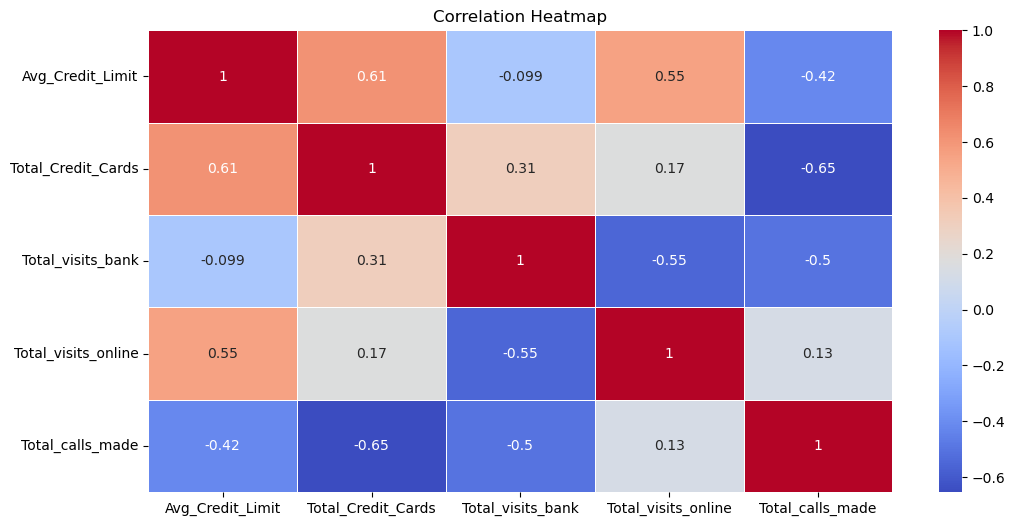

In [22]:
# Check correlation
plot_correlation(df.corr())

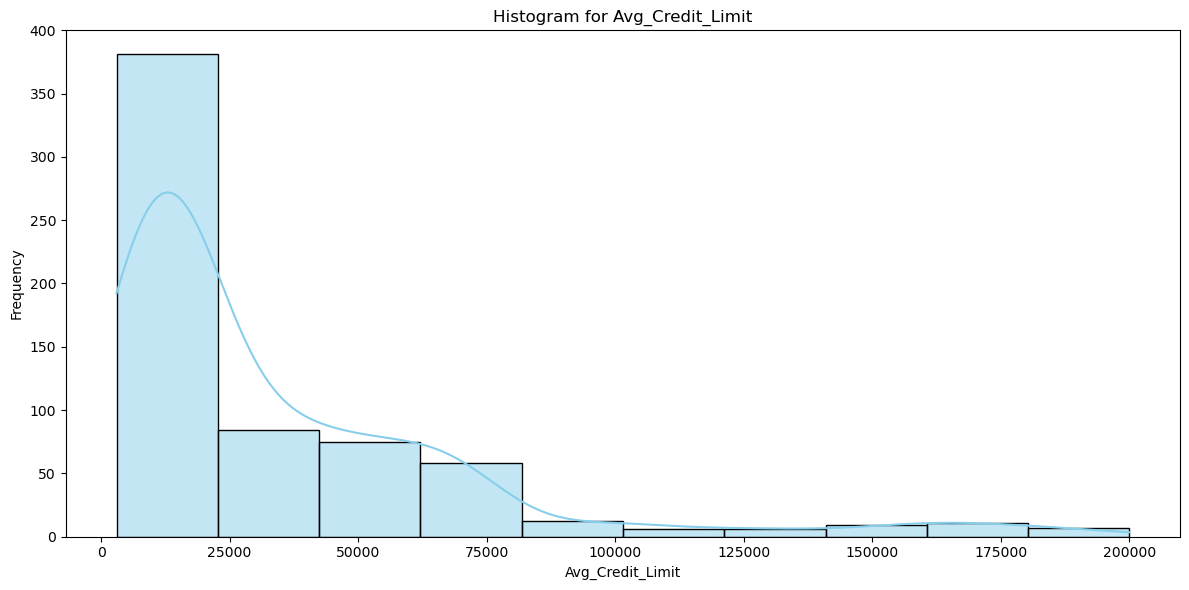

In [24]:
# For Continuous variable
plot_histogram(df, 'Avg_Credit_Limit')

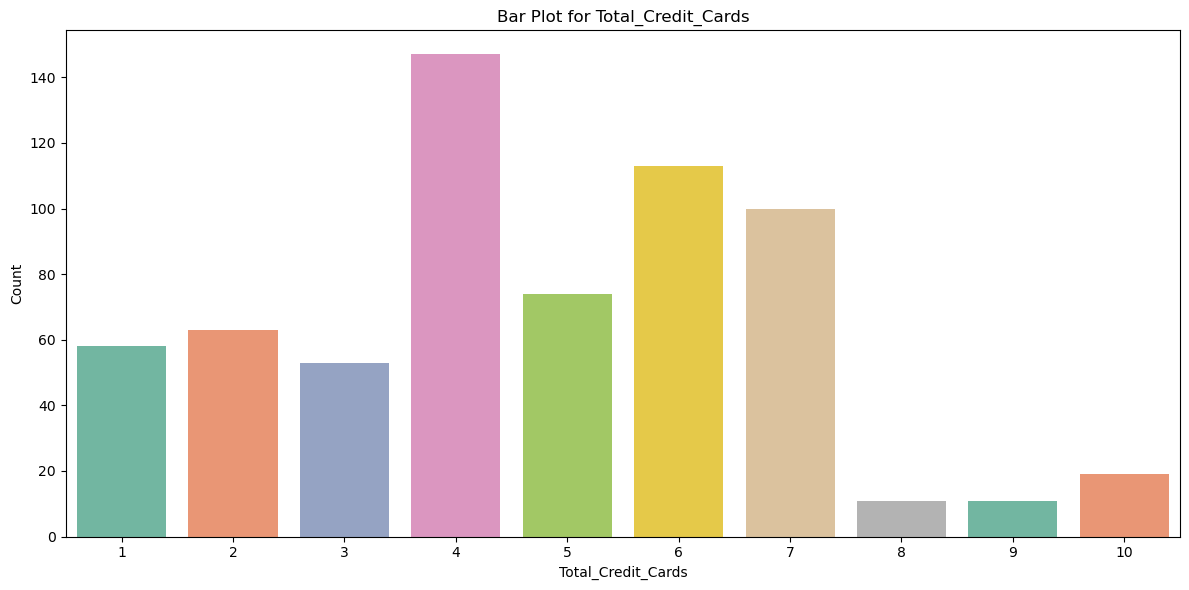

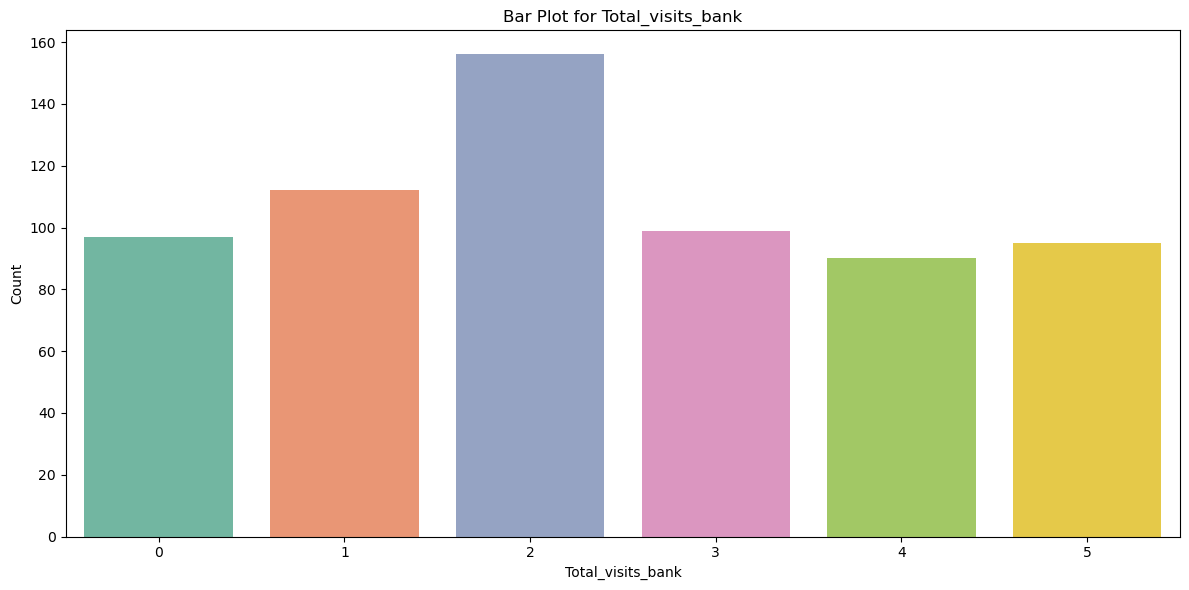

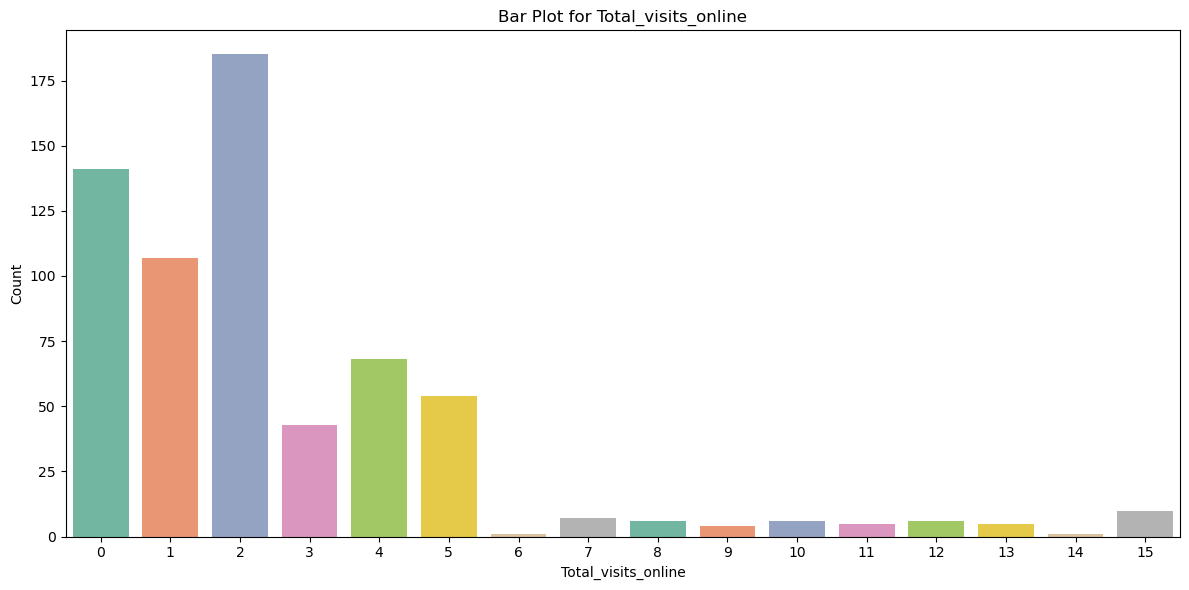

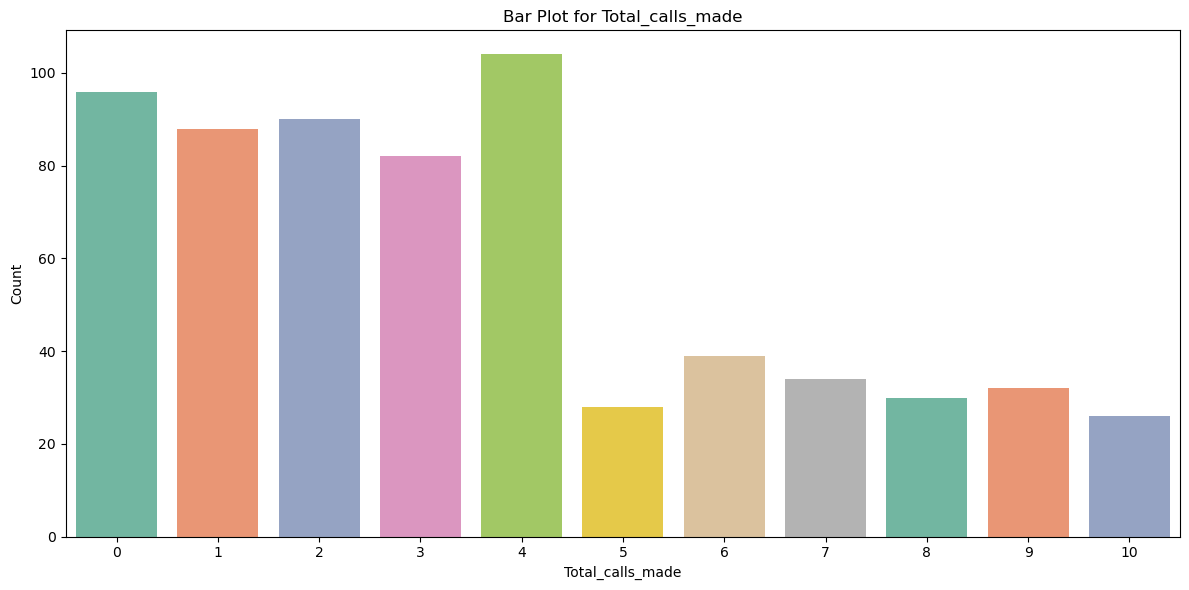

In [26]:
# For Discrete variables
plot_bar(df)

# Part 3: K-Means Clustering

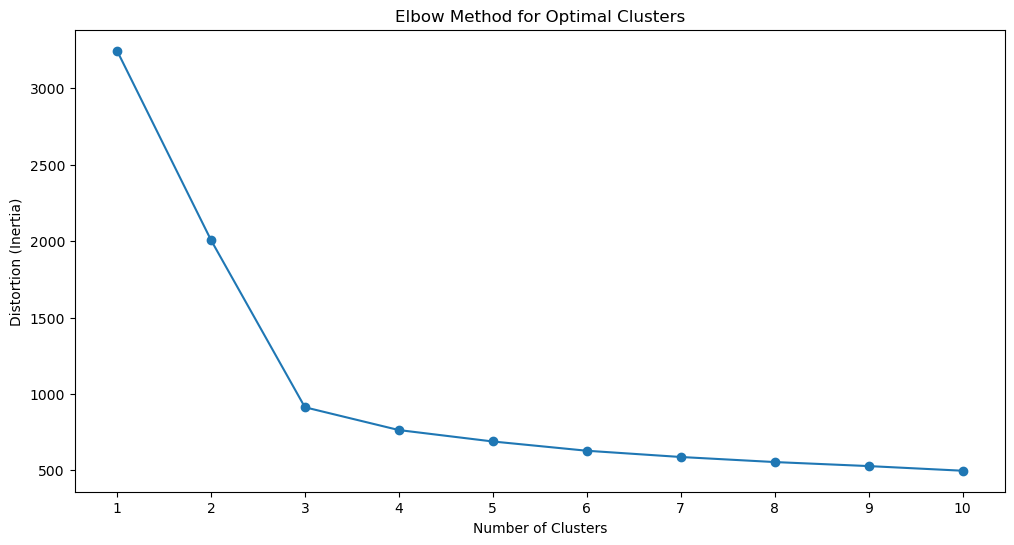


Enter the optimal number of clusters based on the elbow plot: 3
Silhouette Score for 3 clusters: 0.5163


In [28]:
# Apply K-Means Clustering
df_clustering = df.copy()
model, df_cluster, scaler = kmeans_clustering(df_clustering, df_clustering.columns)

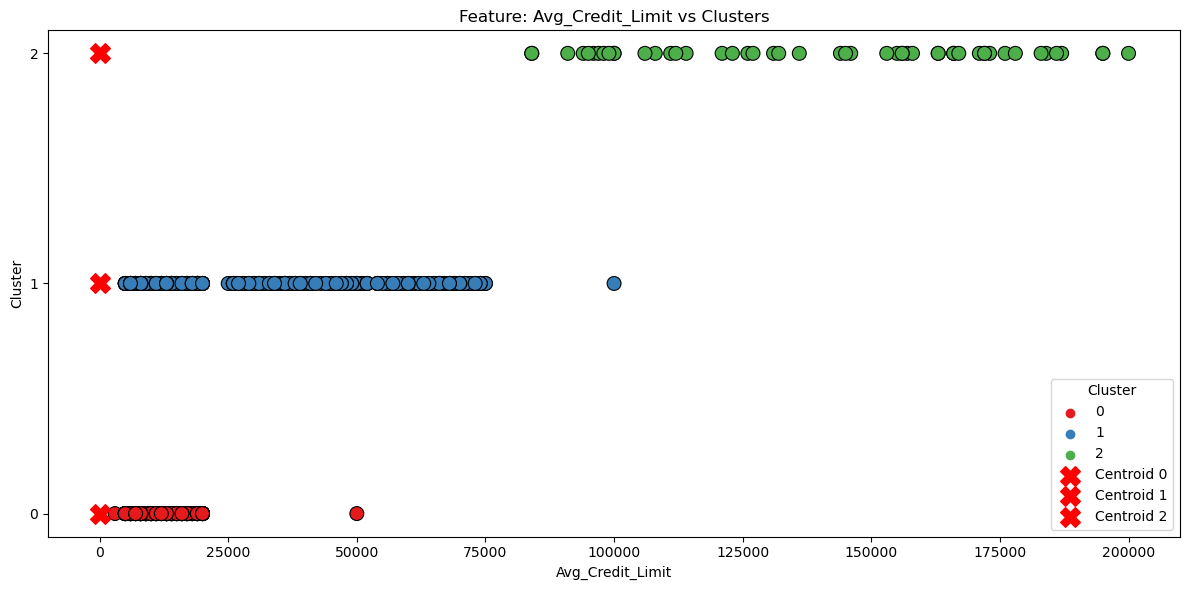

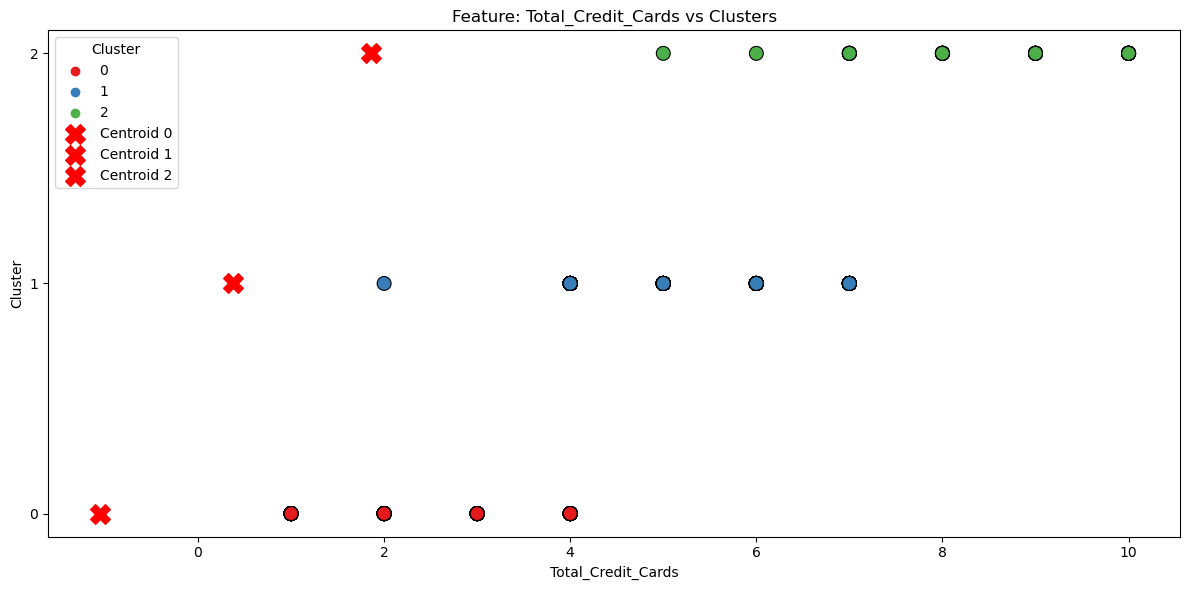

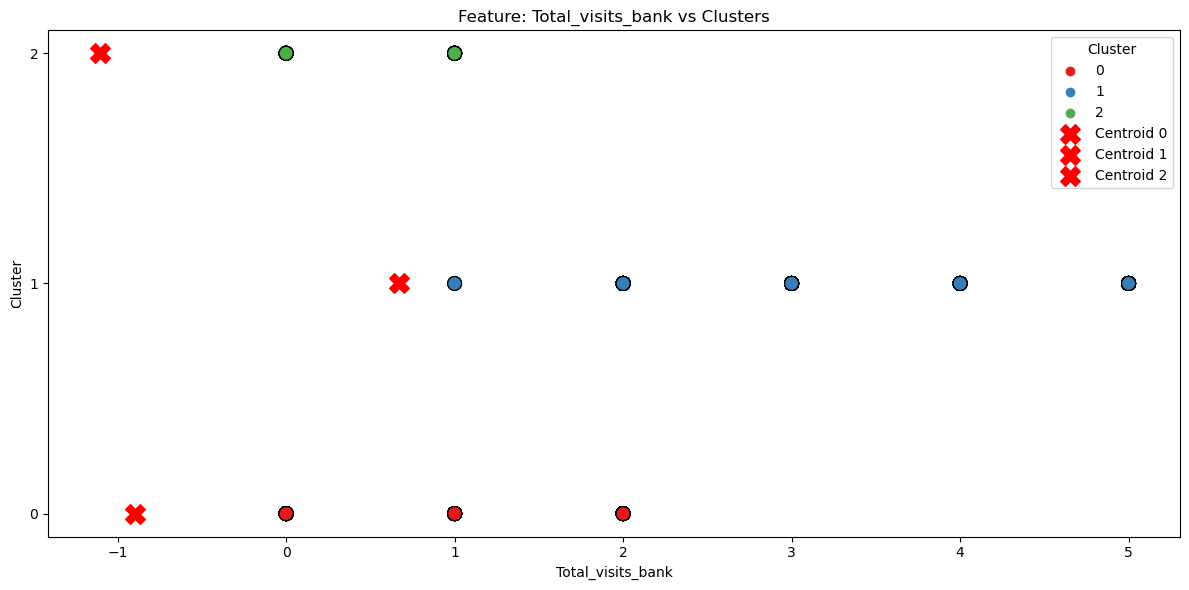

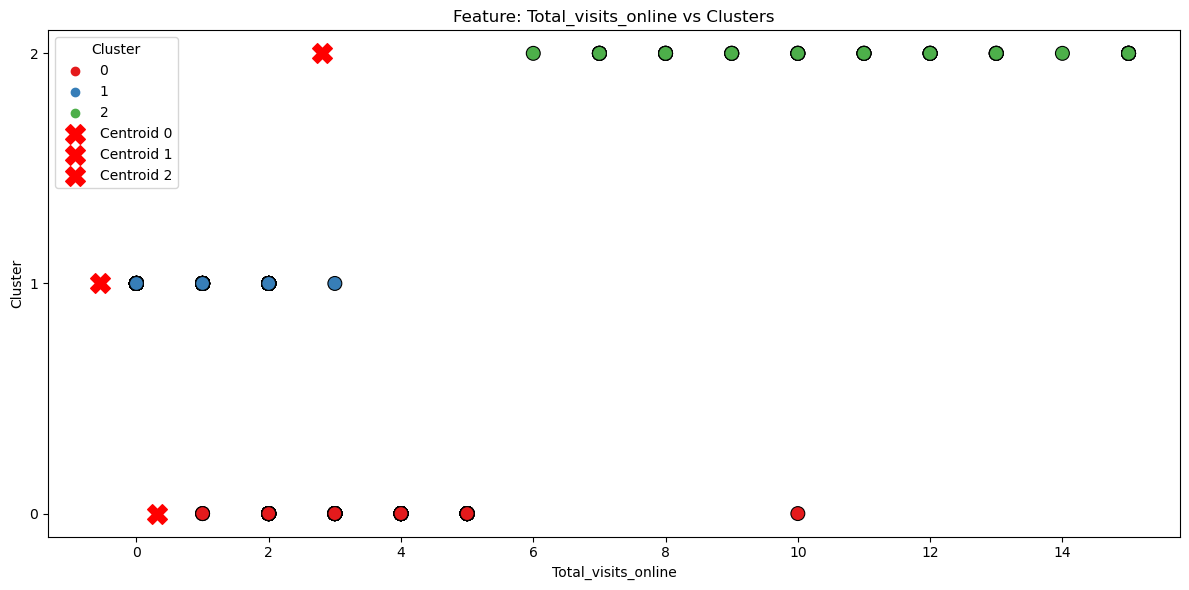

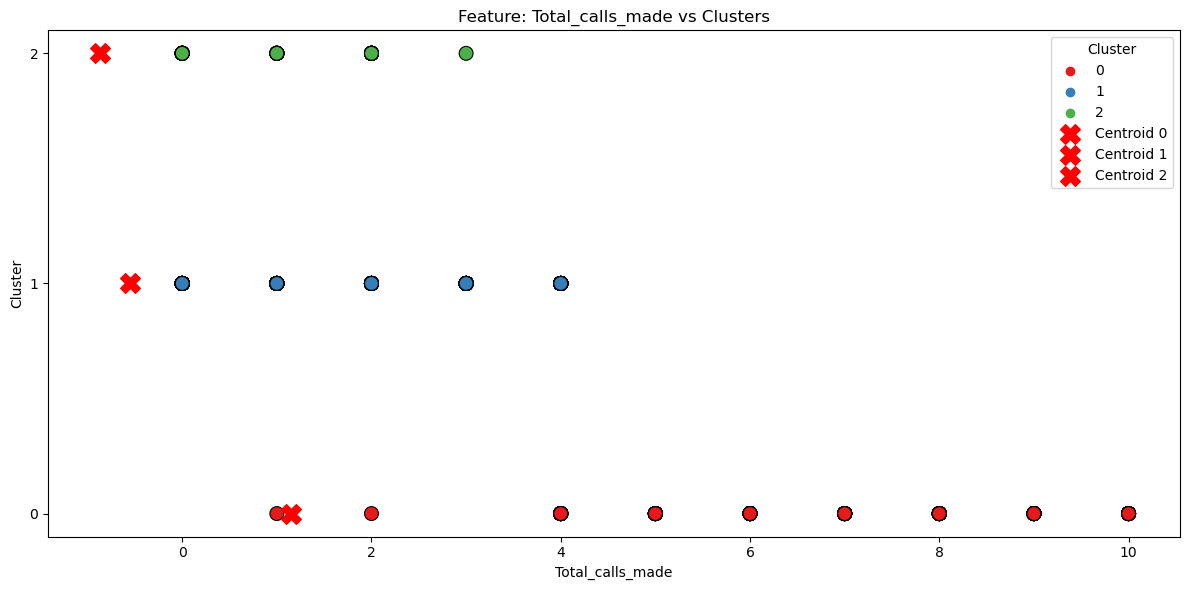

In [30]:
# Plot the kmeans result
plot_kmeans_clusters(df_cluster, df_cluster.columns, model)

In [32]:
# Check clustering on new data
new_df = pd.DataFrame({
    'Avg_Credit_Limit': [75000, 170000],
    'Total_Credit_Cards': [4, 7],
    'Total_visits_bank': [1, 2],
    'Total_visits_online': [5, 10],
    'Total_calls_made': [3, 8]
})

# Predict the cluster assignments
new_df_scaled = scaler.transform(new_df)
cluster_assignments = model.predict(new_df_scaled)
new_df['Predicted_Cluster'] = cluster_assignments
new_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Predicted_Cluster
0,75000,4,1,5,3,0
1,170000,7,2,10,8,2


# Part 4: Regression/Fitting

In [34]:
# Create copy of dataset
df_regression = df.copy()
df_regression.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [36]:
# Features and target
X = df_regression.drop('Avg_Credit_Limit', axis=1)
y = df_regression['Avg_Credit_Limit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
lr

LinearRegression()

In [40]:
# Gradient Boosting Model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
gb

GradientBoostingRegressor()

In [42]:
# Metrics comparison
metrics = {
    'Model': ['Linear Regression', 'Gradient Boosting'],
    'R²': [r2_lr, r2_gb]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,R²
0,Linear Regression,0.566371
1,Gradient Boosting,0.617623


In [44]:
# Check predictions
y_pred_lr = lr.predict(X_test)
y_pred_gb = gb.predict(X_test)
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_LR': y_pred_lr,
    'Predicted_GB': y_pred_gb
})
predictions_df.head()

,Actual,Predicted_LR,Predicted_GB
647,183000,119081.758120,129338.011430
223,20000,2856.606909,9766.634549
605,36000,37250.822322,33577.792944
438,31000,40797.910131,33442.059216
72,11000,14542.060902,12400.955825


<Figure size 1200x600 with 0 Axes>

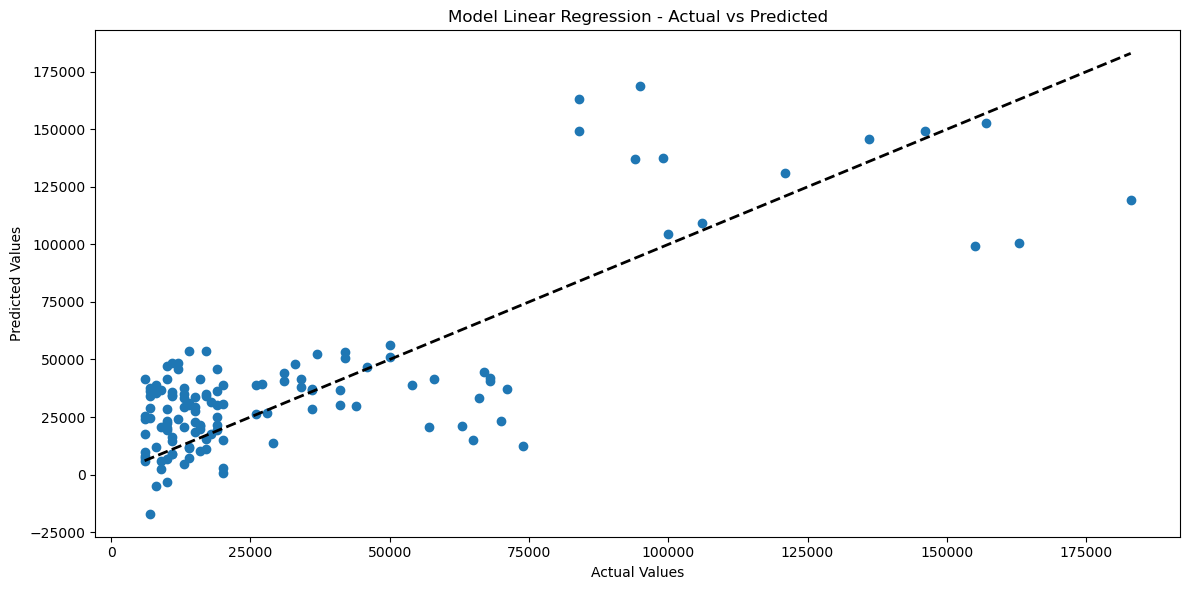

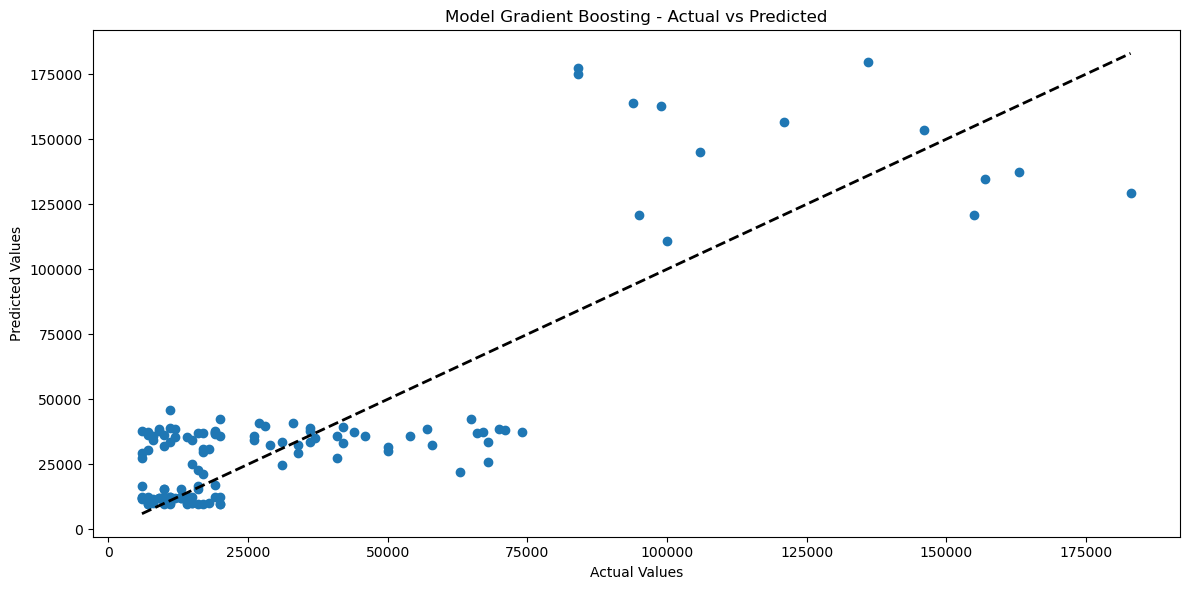

In [46]:
plt.figure(figsize=(12, 6))
# Linear Regression
plot_regression(y_test, y_pred_lr)
# Gradient Boosting
plot_regression(y_test, y_pred_gb, model_name="Gradient Boosting")

# Part 5: Key Observations

### Customer Behavior Insights:
High Credit Limit Customers (>60,000): Likely loyal customers. Make fewer calls (0-2.5). Moderate Credit Limit Customers (~10,000–25,000): Tend to make more calls. Low Credit Limit Customers: Visit the bank more often. Frequent Phone Callers: Usually visit the bank less frequently. Customers with >7 Credit Cards & Avg. Limit >80,000: Prefer online banking. Fewer online visits lead to more phone calls. Avg. Credit Limit >80,000: Engage more frequently with online banking.

### Cluster Overview:

Cluster 0:

Profile: Low credit limit, high number of credit cards.

Behavior: Likely high credit usage and lower income. Complaints are made via phone calls. Suggestions: Relationship managers can provide periodic feedback via calls. Ideal for cross-selling through phone calls.

Cluster 1:

Profile: High income, premium customers.

Behavior:
    Rarely make phone calls.
    Most frequent online users.
    Do not visit the bank.
Suggestions:
    Target with luxury offers via email.
    Focus on online shopping deals and coupons.
    High potential for profitability.
    
Cluster 2:

Profile: Moderate activity customers.

Behavior:
    Median of 3 bank visits.
    Higher bank visit frequency compared to other segments.
    Hold 4-6 credit cards.
Suggestions:
    Cross-sell through in-bank managers.
    Use in-bank promotional ads.